In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("./storage/data/base/dna_sequences.csv")


In [3]:
len(df)

2117642

In [4]:
organisms = df["organism"].unique()

In [5]:
len(organisms)

68185

In [6]:
organisms

array(['Homo sapiens', 'Ypsilopus tricuspis', 'Summerhayesia laurentii',
       ..., 'Lachancea thermotolerans', 'Desulfurococcus mucosus',
       'Felis sp.'], dtype=object)

In [7]:
organisms_counting = df["organism"].value_counts()

In [8]:
organisms_counting

organism
Rotaria magnacalcarata    242140
Rotaria sp. Silwood2      122361
Rotaria sp. Silwood1      110527
Homo sapiens               76442
Rotaria socialis           74219
                           ...  
Paramecium triaurelia          1
Paramecium jenningsi           1
Scytalidium lignicola          1
Rhipidoglossum stolzii         1
Solenangis impraedicta         1
Name: count, Length: 68185, dtype: int64

In [9]:
top_k = 8

top = organisms_counting.head(top_k)
others = organisms_counting[top_k:].sum()

top["other"] = others

In [10]:
def cientific_name(name: str):
	parts = name.split()
	if len(parts) >= 2:
		genus_abrev = parts[0][0] + "."
		rest = " ".join(parts[1:])
		return f"$\\it{{{genus_abrev} {rest}}}$"
	return f"$\\it{{{name}}}$"

In [11]:
top.index = [cientific_name(name) for name in top.index]

In [12]:
top

$\it{R. magnacalcarata}$     242140
$\it{R. sp. Silwood2}$       122361
$\it{R. sp. Silwood1}$       110527
$\it{H. sapiens}$             76442
$\it{R. socialis}$            74219
$\it{A. steineri}$            69242
$\it{R. sordida}$             65250
$\it{D. carnosus}$            62855
$\it{other}$                1294606
Name: count, dtype: int64

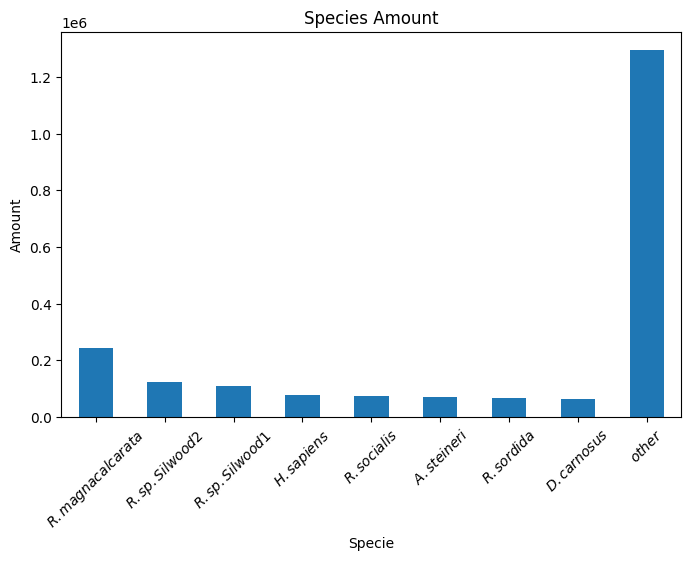

In [13]:
plt.figure(figsize=(8,5))
top.plot(kind="bar")
plt.title("Species Amount")
plt.xlabel("Specie")
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.show()